In [ ]:
                                          Logistique du dernier kilomètre 

Dans ce TP on se propose d'implémenter et de faire une étude très détailée du problème  Logistique du dernier kilomètre  via ∆-TSP par différents moyens que sont : 
- la programmation dynamique
- optimisation linéaire en nombre entier
- recherche locale
- approximation

∆-TSP est un problème d'optimisation combinatoire qui consiste à trouver le chemin le plus court qui passe par chaque ville d'un ensemble donné exactement une fois, en partant et en revenant à la ville de départ. La résolution du TSP est connue pour être NP-difficile, c'est-à-dire qu'il n'existe pas d'algorithme efficace connu pour trouver la solution optimale pour des grandes instances du problème.
Pour chaque approche  on va déterminer de façon expérimentale la taille de problèmes que nous  pouvons traiter en moins d’une minute avec un ordinateur premier prix et si possible pour les méthodes qui peuvent retourner une solution non-optimale, analyser de façon
expérimentale la qualité de la solution obtenue.

### Programmation dynamique 

Dans ce contexte, la méthode de résolution par programmation dynamique, bien que présentant une complexité exponentielle, permet de trouver la solution optimale pour des instances relativement petites. C'est précisément l'objectif de la fonction tsp_dynamic_programming(distances, n) ci-dessous.

Pour y arriver on va avoir besoin de définir 4 fonctions auxillaires: generate_problem(n), verify_solution(solution, n), compute_cost(solution, distances) et iterative_combination(s, j). Le détail sur ces fonctions sera détaillé dans les cells qui suivent.

- generate_problem(n) : 

génère un problème de taille n sous forme de dictionnaire de distances.
cette fonction prend un entier n en entrée et génère un dictionnaire de distances pour un problème de taille n. Les distances sont calculées en utilisant la distance de Manhattan entre chaque paire de villes, c'est-à-dire la somme des distances horizontale et verticale entre deux points.

In [79]:
import random
import numpy as np
import time
from itertools import combinations
import matplotlib.pyplot as plt

In [78]:
def generate_problem(n):
    distances_matrix = np.random.randint(1, 10, size=(n, n))
    np.fill_diagonal(distances_matrix, 0)
    distances_dict = {}
    for i in range(n):
        for j in range(n):
            distances_dict[(i+1, j+1)] = distances_matrix[i][j]
    return distances_dict

In [21]:
# tests
for i in range(10) :
    a={i}
    print( f"problème_{a} =",generate_problem(i))

problème_{0} = {}
problème_{1} = {(1, 1): 0}
problème_{2} = {(1, 1): 0, (1, 2): 2, (2, 1): 6, (2, 2): 0}
problème_{3} = {(1, 1): 0, (1, 2): 5, (1, 3): 7, (2, 1): 9, (2, 2): 0, (2, 3): 6, (3, 1): 8, (3, 2): 2, (3, 3): 0}
problème_{4} = {(1, 1): 0, (1, 2): 4, (1, 3): 5, (1, 4): 3, (2, 1): 7, (2, 2): 0, (2, 3): 7, (2, 4): 5, (3, 1): 5, (3, 2): 1, (3, 3): 0, (3, 4): 7, (4, 1): 3, (4, 2): 3, (4, 3): 7, (4, 4): 0}
problème_{5} = {(1, 1): 0, (1, 2): 1, (1, 3): 6, (1, 4): 3, (1, 5): 7, (2, 1): 8, (2, 2): 0, (2, 3): 7, (2, 4): 4, (2, 5): 7, (3, 1): 1, (3, 2): 2, (3, 3): 0, (3, 4): 2, (3, 5): 3, (4, 1): 2, (4, 2): 2, (4, 3): 1, (4, 4): 0, (4, 5): 6, (5, 1): 4, (5, 2): 4, (5, 3): 5, (5, 4): 1, (5, 5): 0}
problème_{6} = {(1, 1): 0, (1, 2): 2, (1, 3): 4, (1, 4): 4, (1, 5): 6, (1, 6): 9, (2, 1): 3, (2, 2): 0, (2, 3): 6, (2, 4): 7, (2, 5): 9, (2, 6): 9, (3, 1): 9, (3, 2): 2, (3, 3): 0, (3, 4): 4, (3, 5): 3, (3, 6): 5, (4, 1): 7, (4, 2): 1, (4, 3): 2, (4, 4): 0, (4, 5): 8, (4, 6): 6, (5, 1): 6, (5, 2)

- verify_solution(solution, n) : 

cette fonction vérifie si une solution donnée est valide pour un problème de taille n. Elle renvoie True si la solution est valide, c'est-à-dire si chaque ville est visitée exactement une fois et si le chemin emprunté par le voyageur de commerce est valide, c'est-à-dire qu'il passe par chaque ville exactement une fois, en partant et en revenant à la ville de départ.

In [22]:
def is_valid_solution(solution, distances_dict):
    nodes = set([i[0] for i in distances_dict.keys()] + [i[1] for i in distances_dict.keys()])
    # Vérifier que la solution contient tous les noeuds exactement une fois
    if set(solution) != nodes or len(solution) != len(nodes) + 1:
        return False
    # Vérifier que la solution revient au noeud de départ
    if solution[0] != solution[-1]:
        return False
    # Vérifier que la solution respecte les contraintes de distance
    for i in range(len(solution)-1):
        if distances_dict[(solution[i], solution[i+1])] == 0:
            return False
    return True


- compute_cost(solution, distances) :
cette fonction calcule le coût d'une solution donnée à partir d'un dictionnaire de distances. Le coût est simplement la somme des distances entre chaque paire de villes visitées dans l'ordre.

In [23]:


def compute_cost(solution, distances):
    cost = distances[(1, solution[0])] + distances[(1, solution[-1])]
    for i in range(1, len(solution)):
        cost += distances[(solution[i-1], solution[i])]
    return cost

- iterative_combination(s, j) : 

cette fonction génère l'ensemble de clients visités dans l'ordre. Elle est utilisée par la fonction tsp_dynamic_programming pour générer la liste des villes visitées dans l'ordre.

In [24]:
def iterative_combination(s, j):
    s -= {j}
    yield j
    while s:
        j = min(s, key=lambda x: distances[(j, x)])
        s -= {j}
        yield j

- tsp_dynamic_programming(distances, n) :

cette fonction résout le problème du TSP pour un dictionnaire de distances donné à l'aide de la programmation dynamique. Elle renvoie la solution optimale sous forme d'un tuple contenant le coût de la solution optimale et la liste des villes visitées dans l'ordre.

In [25]:


def tsp_dynamic_programming(distances, n):

    # Initialisation
    C = {(frozenset({i}), i): distances[(1, i)] for i in range(2, n+1)}
    for r in range(2, n):
        for subset in combinations(range(2, n+1), r):
            subset = frozenset(subset)
            for j in subset:
                C[(subset, j)] = min(C[(subset-{j}, i)] + distances[(i, j)] for i in subset if i != j)
    # Calcul de la solution optimale
    subset = frozenset(range(2, n+1))
    return min((C[(subset, j)] + distances[(j, 1)], [1] + list(iterative_combination(subset, j)) + [1]) for j in subset)



###### tests

In [26]:
for i in range (5,15) :
    print("pourn n= ", i) 
    distances = generate_problem(i)
    solution = tsp_dynamic_programming(distances, i)[1]
    print("Solution trouvée:", solution)
    print("Coût de la solution:", compute_cost(solution, distances))
    print("la solution est valide:", is_valid_solution(solution,distances))


pourn n=  5
Solution trouvée: [1, 3, 4, 2, 5, 1]
Coût de la solution: 27
la solution est valide: True
pourn n=  6
Solution trouvée: [1, 4, 3, 5, 2, 6, 1]
Coût de la solution: 26
la solution est valide: True
pourn n=  7
Solution trouvée: [1, 2, 7, 3, 4, 5, 6, 1]
Coût de la solution: 35
la solution est valide: True
pourn n=  8
Solution trouvée: [1, 3, 8, 4, 5, 6, 7, 2, 1]
Coût de la solution: 38
la solution est valide: True
pourn n=  9
Solution trouvée: [1, 5, 6, 4, 8, 9, 3, 7, 2, 1]
Coût de la solution: 24
la solution est valide: True
pourn n=  10
Solution trouvée: [1, 6, 10, 4, 8, 7, 9, 2, 5, 3, 1]
Coût de la solution: 31
la solution est valide: True
pourn n=  11
Solution trouvée: [1, 5, 8, 6, 3, 2, 11, 7, 4, 10, 9, 1]
Coût de la solution: 34
la solution est valide: True
pourn n=  12
Solution trouvée: [1, 7, 6, 9, 4, 2, 5, 10, 12, 8, 3, 11, 1]
Coût de la solution: 34
la solution est valide: True
pourn n=  13
Solution trouvée: [1, 7, 3, 2, 4, 10, 5, 9, 13, 8, 11, 12, 6, 1]
Coût de la so

###### conclusion 1 :

la fonction tsp_dynamic_programming utilise l'algorithme de programmation dynamique pour résoudre le problème du ∆-TSP de manière exacte, c'est-à-dire qu'elle garantit de trouver la solution optimale pour un problème donné.

La complexité temporelle de cet algorithme est exponentielle, elle est en O(n^2*2^n) où n est la taille du problème (le nombre de clients dans le graphe). Cela signifie que le temps de calcul peut devenir rapidement très important lorsque le nombre de clients augmente. Cependant, la programmation dynamique est l'un des rares algorithmes qui peuvent fournir une solution exacte pour des instances de TSP de taille raisonnable.

Il est important de noter que même si l'algorithme de programmation dynamique garantit de trouver la solution optimale, cela ne signifie pas que c'est toujours la meilleure solution en termes de temps de calcul

##### Recherche expérimentale des tailles de problèmes que tsp_dynamic_programming peut résoudre en moins d'une minute

Pour déterminer expérimentalement la taille maximale de problèmes que l'algorithme tsp_dynamic_programming peut traiter en moins d'une minute, nous pouvons exécuter l'algorithme pour des valeurs croissantes de n jusqu'à atteindre le temps d'une minute. Nous pouvons ensuite utiliser la dernière valeur de n pour laquelle l'algorithme a réussi à trouver une solution en moins d'une minute comme estimation de la taille maximale de problème que l'algorithme peut traiter dans ces conditions.

In [64]:
import time

n = 2
while True:
    distances = generate_problem(n)
    start_time = time.time()
    tsp_dynamic_programming(distances, n)
    elapsed_time = time.time() - start_time
    if elapsed_time >= 60:
        break
    n += 1

print("La taille maximale de problème que tsp_dynamic_programming peut traiter en moins d'une minute est :", n-1)


La taille maximale de problème que tsp_dynamic_programming peut traiter en moins d'une minute est : 18


##### Vitesse d'execution et limites de l'approche progrmmation dynamique 

Dans cette section on se propose d'illustrer les limites de l'approche programmation dynamique pour des problème de grande taille au travers de sa vitesse d'exécution.

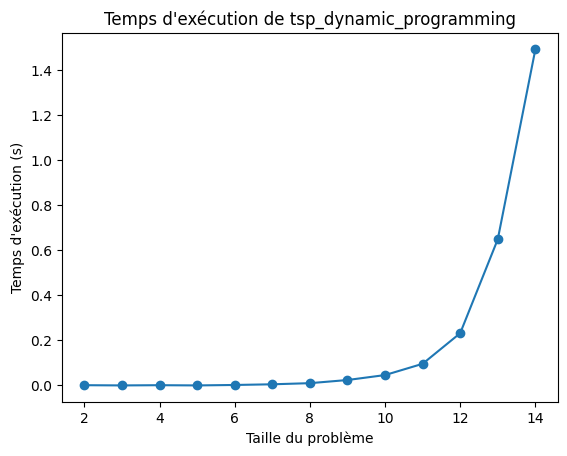

In [27]:
import matplotlib.pyplot as plt

# Définition de la liste des tailles de problèmes à tester
n_values = list(range(2, 15))

# Mesure du temps d'exécution pour chaque taille de problème
times = []
for n in n_values:
    distances = generate_problem(n)
    start_time = time.time()
    tsp_dynamic_programming(distances, n)
    end_time = time.time()
    times.append(end_time - start_time)

plt.plot(n_values, times, 'o-')
plt.title("Temps d'exécution de tsp_dynamic_programming")
plt.xlabel("Taille du problème")
plt.ylabel("Temps d'exécution (s)")
plt.show()


##### conclusion 2 : Après visualisation on conclue que pour des valeurs assez petit ,à partir de n= 10 le temps d'execution croît exponentiellement et cela s'explique par sa complexité temporelle qui est égale à O(n^2 * n^2)

### Optimisation linéaire en nombres entiers

### Approche locale 

La recherche locale est une technique de résolution de problèmes combinatoires qui consiste à partir d'une solution initiale et à itérer sur un ensemble de solutions voisines pour chercher une solution améliorante. C'est une méthode heuristique qui ne garantit pas de trouver la meilleure solution, mais qui est souvent efficace pour trouver des solutions de qualité en temps raisonnable. Nous expliciterons ceci dans les cells qui suivent

- is_valid_solution : 

vérifie si une solution donnée pour le TSP est valide, c'est-à-dire si elle contient tous les noeuds exactement une fois, si elle revient au noeud de départ et si elle respecte les contraintes de distance du graphe. c'est la même fonction que précedemment

In [29]:
def is_valid_solution(solution, distances_dict):
    nodes = set([i[0] for i in distances_dict.keys()] + [i[1] for i in distances_dict.keys()])
    # Vérifier que la solution contient tous les noeuds exactement une fois
    if set(solution) != nodes or len(solution) != len(nodes) + 1:
        return False
    # Vérifier que la solution revient au noeud de départ
    if solution[0] != solution[-1]:
        return False
    # Vérifier que la solution respecte les contraintes de distance
    for i in range(len(solution)-1):
        if distances_dict[(solution[i], solution[i+1])] == 0:
            return False
    return True


- delta_tsp_localsearch : 
    
La fonction delta_tsp ci desssous prend en entrée un dictionnaire distances_dict représentant les distances entre les différents nœuds du graphe, et retourne une solution (pas nécessairement optimale) sous la forme d'une liste des nœuds visités dans l'ordre.

La première étape consiste à générer une solution initiale aléatoire en choisissant un nœud de départ, en permutant les autres nœuds et en retournant au nœud de départ. Ensuite, l'algorithme boucle sur les étapes suivantes:

Rechercher le meilleur voisin dans le voisinage de la solution actuelle. Le voisinage est défini comme toutes les solutions qui peuvent être obtenues en supprimant deux arêtes qui ne partagent pas de nœuds et en ajoutant deux nouvelles arêtes pour reconstituer un circuit. Le coût de chaque voisin est calculé en utilisant la formule donnée dans l'énoncé.

Si un voisin est trouvé avec un coût inférieur à celui de la solution actuelle, mettre à jour la solution actuelle avec cette nouvelle solution et continuer à chercher des voisins.

Si aucun voisin n'est trouvé avec un coût inférieur à celui de la solution actuelle, retourner la solution actuelle.

Notez que l'algorithme ne garantit pas de trouver une solution optimale, mais il est capable de trouver des solutions de haute qualité pour de nombreux problèmes du voyageur de commerce.
    

In [30]:
def delta_tsp_searchlocal(distances_dict):
    # Initial solution
    nodes = list(set([i[0] for i in distances_dict.keys()] + [i[1] for i in distances_dict.keys()]))
    current_solution = [nodes[0]] + list(np.random.permutation(nodes[1:])) + [nodes[0]]
    current_cost = sum([distances_dict[(current_solution[k], current_solution[k+1])] for k in range(len(current_solution)-1)])
    
    while True:
        # On cherche un meilleur voisin
        best_solution = current_solution
        best_cost = current_cost
        for i in range(1, len(current_solution) - 2):
            for j in range(i+1, len(current_solution) - 1):
                new_solution = current_solution[:i] + current_solution[j:i-1:-1] + current_solution[j+1:]
                new_cost = sum([distances_dict[(new_solution[k], new_solution[k+1])] for k in range(len(new_solution)-1)])
                if new_cost < best_cost:
                    best_solution = new_solution
                    best_cost = new_cost
        
        # Si y'a pas de meilleur voisin, on retourne la solution courante et coût
        if best_solution == current_solution:
            return current_solution, current_cost
        
        # Néanmoins, on met à jour la solution courante et on continue la recheche
        current_solution = best_solution
        current_cost = best_cost

In [40]:
# tests 
for j in range(1,15):
    print("Pour n=", j)
    distances =  generate_problem(j)
    solution,cout= delta_tsp_searchlocal(distances)
    print("La solution est :", solution)
    print("le cout est:", cout)
    print("la solution est valide:",is_valid_solution(solution,distances))

Pour n= 1
La solution est : [1, 1]
le cout est: 0
la solution est valide: False
Pour n= 2
La solution est : [1, 2, 1]
le cout est: 10
la solution est valide: True
Pour n= 3
La solution est : [1, 2, 3, 1]
le cout est: 16
la solution est valide: True
Pour n= 4
La solution est : [1, 3, 2, 4, 1]
le cout est: 14
la solution est valide: True
Pour n= 5
La solution est : [1, 3, 2, 4, 5, 1]
le cout est: 17
la solution est valide: True
Pour n= 6
La solution est : [1, 5, 2, 4, 3, 6, 1]
le cout est: 21
la solution est valide: True
Pour n= 7
La solution est : [1, 5, 4, 7, 2, 3, 6, 1]
le cout est: 16
la solution est valide: True
Pour n= 8
La solution est : [1, 5, 8, 6, 3, 2, 7, 4, 1]
le cout est: 25
la solution est valide: True
Pour n= 9
La solution est : [1, 4, 5, 6, 8, 7, 9, 2, 3, 1]
le cout est: 31
la solution est valide: True
Pour n= 10
La solution est : [1, 3, 8, 5, 9, 6, 4, 2, 7, 10, 1]
le cout est: 31
la solution est valide: True
Pour n= 11
La solution est : [1, 3, 10, 5, 4, 8, 6, 2, 11, 9, 7

##### Recherche expérimentale des tailles de problèmes que delta_tsp_searchlocal peut résoudre en moins d'une minute

Quelle est la taille maximale de problème que delta_tsp_seachlocal peut résoudre en moins d'une minute ?                                   

executez le cell suivant pour voir la réponse

In [31]:
# pour n= 95
distances = generate_problem(95)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

18.144999980926514


In [32]:
# pour n= 100
distances = generate_problem(100)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

24.003999948501587


In [33]:
# pour n= 110
distances = generate_problem(110)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

25.198000192642212


In [34]:
# pour n= 130
distances = generate_problem(130)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

50.14100003242493


In [39]:
# pour n= 149
distances = generate_problem(150)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

127.25999999046326


In [ ]:
# pour n= 150
distances = generate_problem(150)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)

In [40]:
print("la taille maximale est de 149")

la taille maximale est de 149


##### Qualité de solution obtenue

Delta TSP (local search) - coût :  40
TSP (dynamic programming) - coût :  58


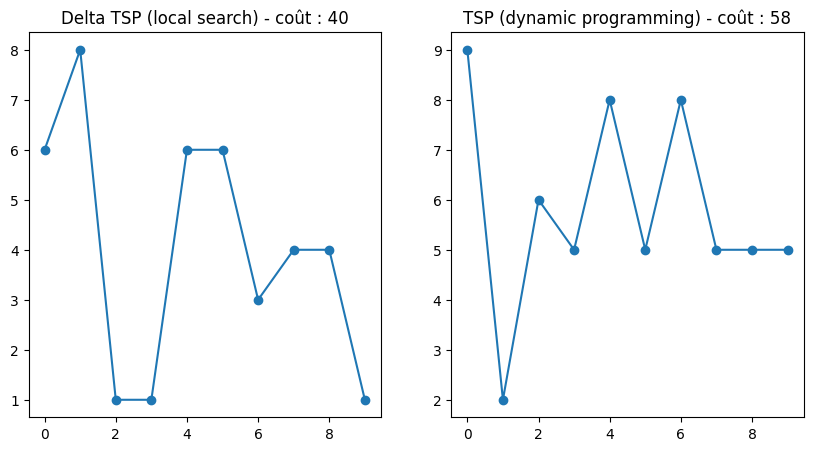

Delta TSP (local search) - coût :  34
TSP (dynamic programming) - coût :  46


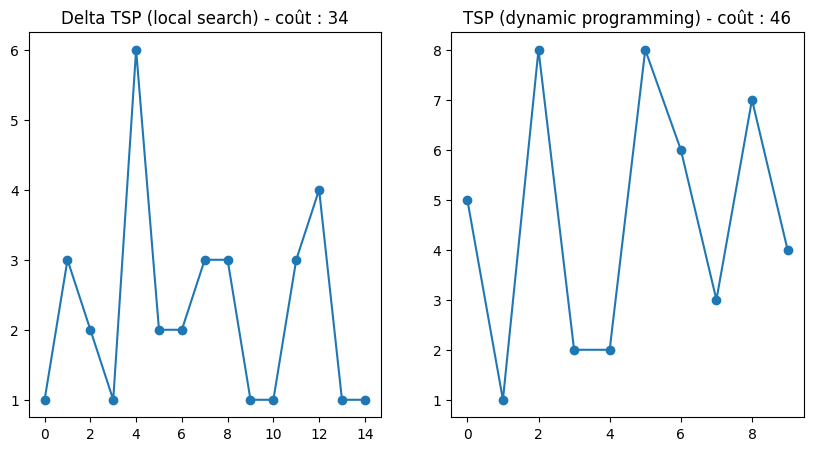

Delta TSP (local search) - coût :  57
TSP (dynamic programming) - coût :  48


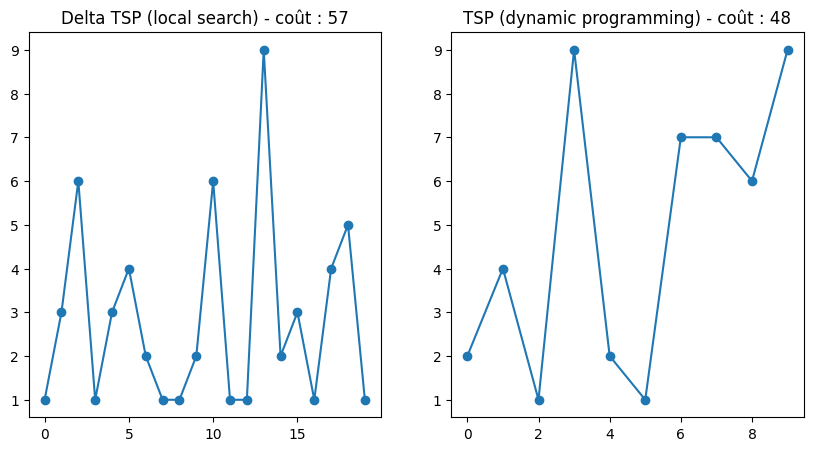

Delta TSP (local search) - coût :  67
TSP (dynamic programming) - coût :  40


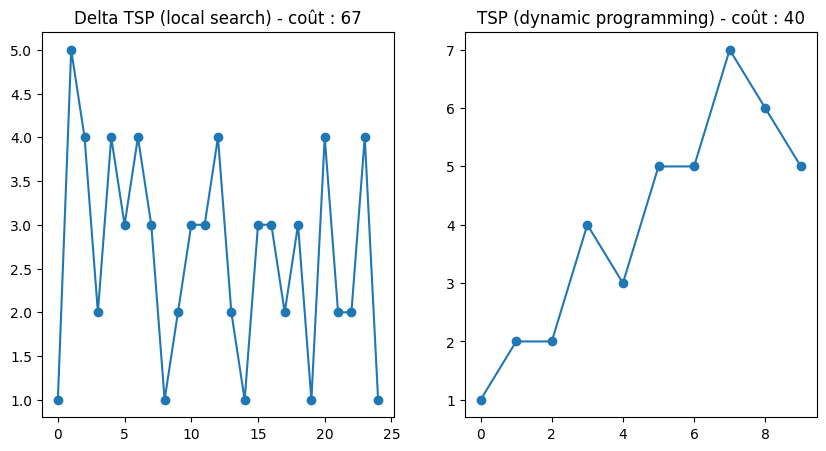

Delta TSP (local search) - coût :  65
TSP (dynamic programming) - coût :  60


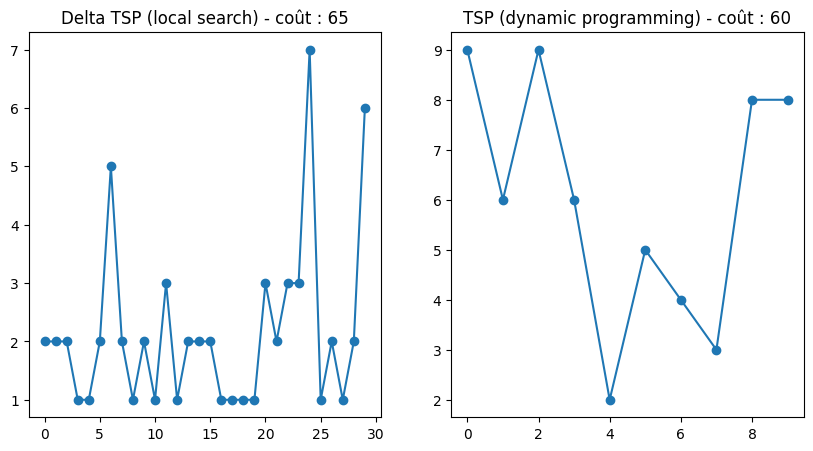

Delta TSP (local search) - coût :  91
TSP (dynamic programming) - coût :  58


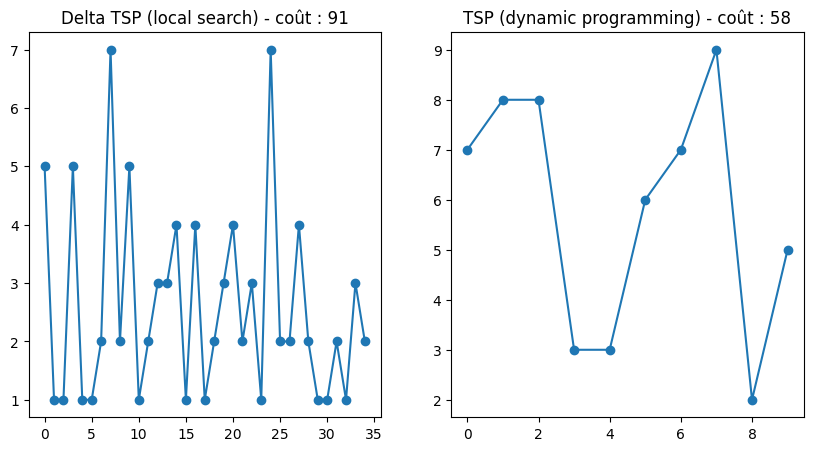

Delta TSP (local search) - coût :  86
TSP (dynamic programming) - coût :  39


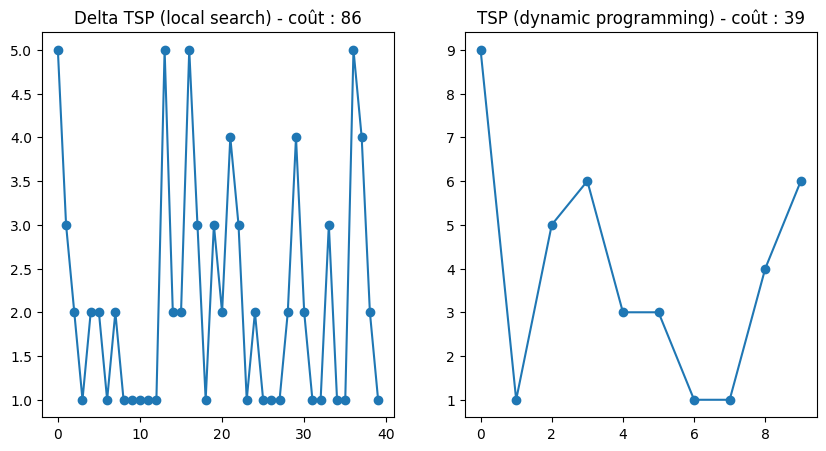

Delta TSP (local search) - coût :  114
TSP (dynamic programming) - coût :  61


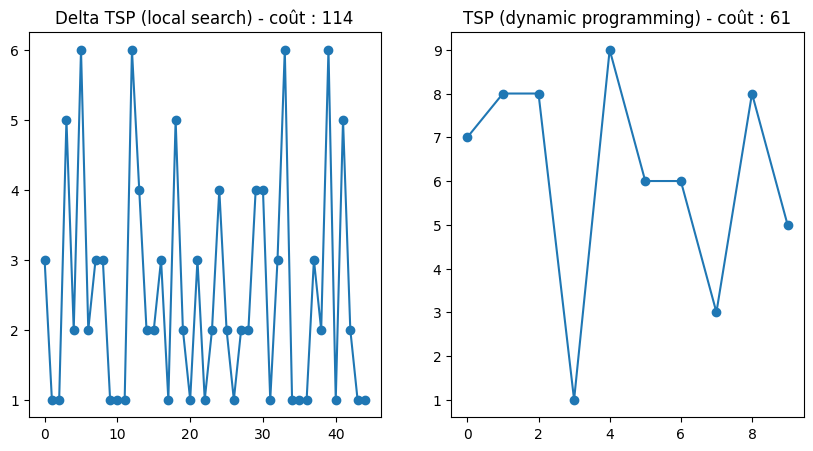

In [70]:
import numpy as np
import matplotlib.pyplot as plt

for j in range (10,50,5):
    distances_dict = generate_problem(j)
    current_solution, current_cost = delta_tsp_searchlocal(distances_dict)
    print("Delta TSP (local search) - coût : ", current_cost)

    # Calcul de la solution avec tsp_dynamic_programming
    _, optimal_solution = tsp_dynamic_programming(distances_dict, 10)
    optimal_cost = sum([distances_dict[(optimal_solution[k], optimal_solution[k+1])] for k in range(len(optimal_solution)-1)])
    print("TSP (dynamic programming) - coût : ", optimal_cost)

    # Visualisation des solutions
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot([distances_dict[(current_solution[k], current_solution[k+1])] for k in range(len(current_solution)-1)], 'o-')
    axs[0].set_title("Delta TSP (local search) - coût : " + str(current_cost))
    axs[1].plot([distances_dict[(optimal_solution[k], optimal_solution[k+1])] for k in range(len(optimal_solution)-1)], 'o-')
    axs[1].set_title("TSP (dynamic programming) - coût : " + str(optimal_cost))
    plt.show()


Les graphiques représentent les chemins parcourus par les deux algorithmes (delta_tsp_searchlocal et tsp_dynamic_programming) en fonction de l'ordre des noeuds dans le problème TSP.

- conclusion : 

en étudiant les graphiques et en faisant varier les valeurs de n, on constate la qualité de la solution de la programmation est bien meilleure et de loin car elle passe passe par moins de noeuds pour un coût moindre. 

### Approximation

L'approche d'approximation pour le problème du voyageur de commerce consiste à trouver une solution qui garantit une certaine qualité par rapport à la solution optimale. Cette approche utilise des algorithmes classiques tels que Prim ou Kruskal pour obtenir un arbre de recouvrement minimum. Le poids de cet arbre est une borne inférieure pour le coût d'un circuit optimal pour le problème du voyageur de commerce. Ensuite, on réalise un parcours préfixe de l'arbre obtenu en visitant les nœuds puis les fils de manière récursive. En ajoutant la racine de l'arbre à la fin de ce parcours, on obtient un circuit pour le problème du voyageur de commerce. On vérifie ensuite que le coût de ce parcours est au plus deux fois le coût de l'arbre de recouvrement minimum. Ainsi, la solution trouvée par cette méthode est garantie d'être au plus deux fois le coût de la solution optimale. Cependant, cette garantie ne s'applique que dans le pire des cas et en pratique, la solution trouvée peut être plus proche de la solution optimale.

Pour ce faire, on rédefinit : verify_solution(clients,path) and compute_cost(clients,path)

Le code ci-dessous définit une fonction nommée "delta_tsp_approximation" qui résout le problème du voyageur de commerce pour une instance donnée en utilisant une heuristique d'approximation. Le code utilise l'algorithme de l'arbre de recouvrement minimum pour trouver une borne supérieure pour le coût optimal de la tournée et retourne une solution approchée pour le problème. Nous allons allons commenter d'abord les fonctions auxilliaires et en expliquant comment elles sont utilisées par delta_tsp_approximation, avant de détailler "delta_tsp_approximation".

- is_valid_tour(tour, n): 
Cette fonction vérifie si la tournée contient exactement n + 1 villes, où n est le nombre total de villes dans l'instance du problème. De plus, elle vérifie que la première et la dernière ville dans la tournée sont les mêmes, et que chaque ville apparaît exactement une fois dans la tournée.

Si la tournée n'est pas valide, la fonction retourne None, sinon elle calcule la borne supérieure pour le coût optimal de la tournée en doublant le coût de l'arbre de recouvrement minimum. Cette borne supérieure est stockée dans une variable appelée "upper_bound"

In [7]:
def is_valid_tour(tour, n):
    # Vérifie que le circuit est valide
    return len(tour) == n+1 and tour[0] == tour[-1] and set(tour) == set(range(1, n+1))

- calculate_cost(tour, distances):

Cette fonction vérifie si la tournée contient exactement n + 1 villes, où n est le nombre total de villes dans l'instance du problème. De plus, elle vérifie que la première et la dernière ville dans la tournée sont les mêmes, et que chaque ville apparaît exactement une fois dans la tournée.

Si la tournée n'est pas valide, la fonction retourne None, sinon elle calcule la borne supérieure pour le coût optimal de la tournée en doublant le coût de l'arbre de recouvrement minimum. Cette borne supérieure est stockée dans une variable appelée "upper_bound" dans delta_tsp_approximation.

Enfin, la fonction calcule le coût de la tournée en appelant la fonction "calculate_cost" et retourne un tuple contenant la tournée, son coût et la borne supérieure

In [56]:
def calculate_cost(tour, distances):
    # Calcule le coût d'un circuit
    cost = 0
    for i in range(len(tour)-1):
        cost += distances[(tour[i], tour[i+1])]
    return cost

- delta_tsp(distances):  

La première étape de la fonction est de calculer l'arbre de recouvrement minimum à l'aide de l'algorithme de Prim. Cela est fait en construisant un graphe non orienté avec des sommets représentant les villes et des arêtes ayant des poids égaux aux distances entre les villes correspondantes dans la matrice de distance. L'algorithme de Prim est ensuite utilisé pour trouver l'arbre de recouvrement minimum en partant d'un sommet de départ.

Ensuite, un parcours préfixe de l'arbre de recouvrement minimum est effectué pour former une tournée qui visite chaque ville une fois et termine au point de départ. Cette tournée est stockée dans une liste appelée "tour".

In [54]:
def delta_tsp_approximation(distances):
    n = int(np.sqrt(len(distances)))
    
    # Calcul de l'arbre de recouvrement minimum
    graph = {i+1: set() for i in range(n)}
    for i, j in distances:
        graph[i].add(j)
        graph[j].add(i)
    
    visited = set()
    start_node = 1
    priority_queue = [(0, start_node)]
    
    mst = []
    while priority_queue:
        (cost, node) = priority_queue.pop(0)
        if node not in visited:
            visited.add(node)
            mst.append(node)
            for neighbor in graph[node]:
                priority_queue.append((distances[(node, neighbor)], neighbor))
            priority_queue.sort()
    
    # Parcours préfixe de l'arbre de recouvrement minimum
    tour = [mst[0]]
    def visit(node):
        tour.append(node)
        for neighbor in graph[node]:
            if neighbor not in tour:
                visit(neighbor)
    visit(mst[0])
    
    # Ajout de la racine pour former un circuit
    tour.append(mst[0])
    
    # Calcul de la borne supérieure du coût du circuit
    tour_cost = calculate_cost(tour, distances)
    mst_cost = sum(distances[(mst[i], mst[i+1])] for i in range(len(mst)-1))
    upper_bound = 2*mst_cost
    
    return tour, tour_cost, upper_bound

In [10]:
# test delta_tsp_approximation
n=5
distances = generate_problem(n)
sol = delta_tsp_approximation(distances)
print("le circuit =" , sol[0])
print("coût =" , sol[1])
print("borne supérieure du coût =" , sol[2])



le circuit = [1, 1, 2, 3, 4, 5, 1]
coût = 23
borne supérieure du coût = 16


In [11]:
# test delta_tsp_approximation
n=15
distances = generate_problem(n)
sol = delta_tsp_approximation(distances)
print("le circuit =" , sol[0])
print("coût =" , sol[1])
print("borne supérieure du coût =" , sol[2])


le circuit = [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1]
coût = 60
borne supérieure du coût = 110


##### determination de façon expérimentale la qualité de la solution obtenue avec delta_tsp_approximation

Il est possible que la solution obtenue par l'approche de Δ-TSP s'éloigne considérablement de la solution optimale trouvée par l'algorithme de programmation dynamique, en particulier pour des instances de problèmes de grande taille. Cela est dû au fait que l'approche de Δ-TSP est une méthode heuristique qui fournit une solution approchée, mais qui ne garantit pas la qualité de la solution par rapport à la solution optimale.

Cependant, il est important de noter que la qualité de la solution obtenue dépend de plusieurs facteurs, tels que la taille de l'instance du problème, la structure de l'instance et la méthode utilisée pour construire l'arbre de recouvrement minimum. Dans certains cas, la solution obtenue par l'approche de Δ-TSP peut se rapprocher considérablement de la solution optimale, mais il est difficile de généraliser cela pour toutes les instances du problème.

Dans tous les cas, il est important d'évaluer la qualité de la solution obtenue et de comparer cette solution à la solution optimale si elle est disponible, ou à une borne inférieure/supérieure de la solution optimale si la taille du problème ne permet pas de calculer une solution optimale.

Ainsi ci dessous on essaie d'évaluer la qualité de la solution obtenue. Poue ce faire,ce code génère un problème TSP aléatoire avec 10 villes, résout le problème à l'aide de l'algorithme de programmation dynamique, calcule la borne supérieure du coût du circuit à l'aide de la fonction delta_tsp(), puis affiche le coût de la solution optimale, la borne supérieure du coût du circuit, la qualité de la solution obtenue et le circuit optimal. Enfin, il utilise la bibliothèque matplotlib pour afficher une visualisation du circuit optimal.

pour n = 10
Delta TSP (approximation) - coût :  52
TSP (dynamic programming) - coût :  47


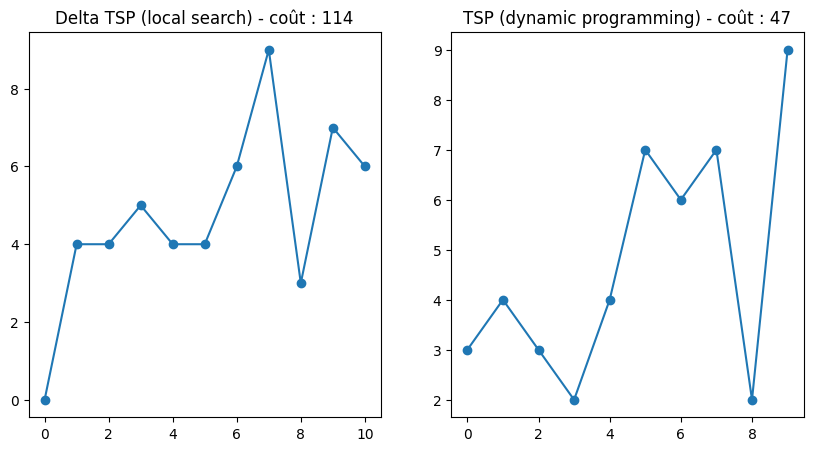

pour n = 10
Delta TSP (approximation) - coût :  55
TSP (dynamic programming) - coût :  65


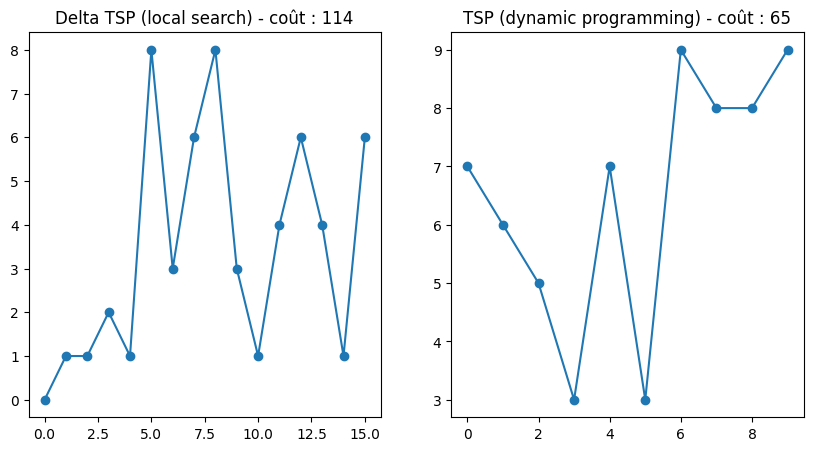

pour n = 10
Delta TSP (approximation) - coût :  90
TSP (dynamic programming) - coût :  48


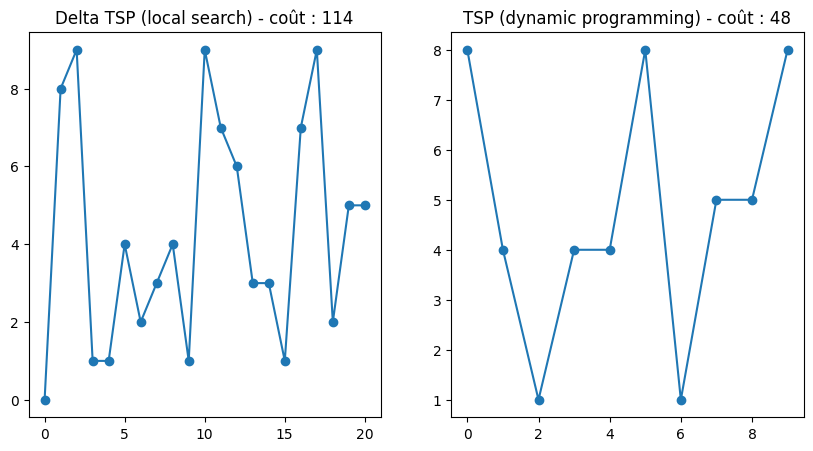

pour n = 10
Delta TSP (approximation) - coût :  106
TSP (dynamic programming) - coût :  60


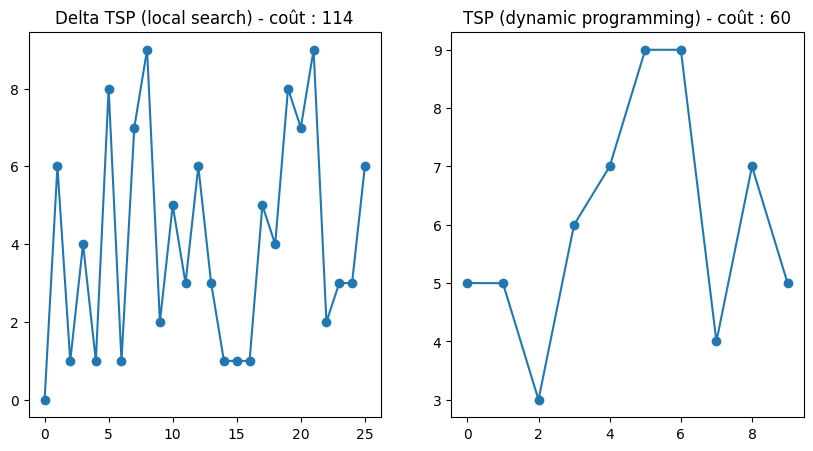

pour n = 10
Delta TSP (approximation) - coût :  152
TSP (dynamic programming) - coût :  55


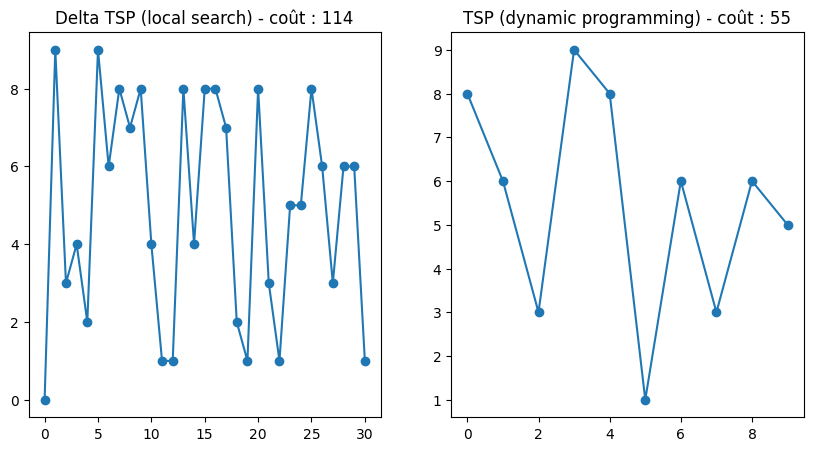

pour n = 10
Delta TSP (approximation) - coût :  168
TSP (dynamic programming) - coût :  38


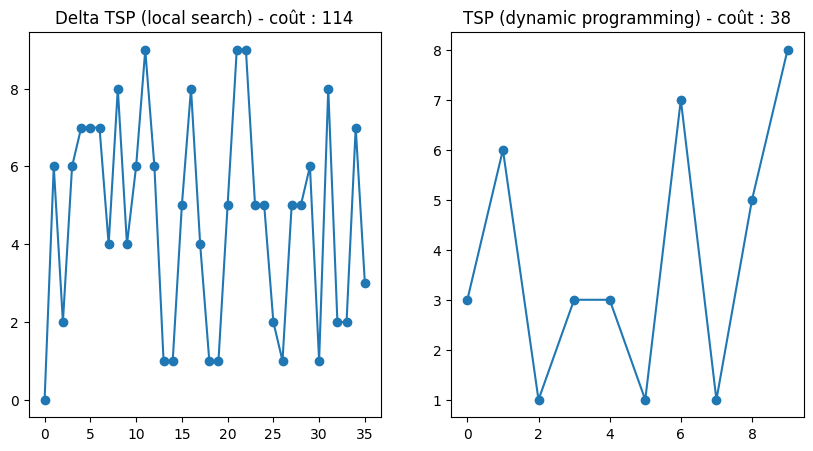

pour n = 10
Delta TSP (approximation) - coût :  203
TSP (dynamic programming) - coût :  39


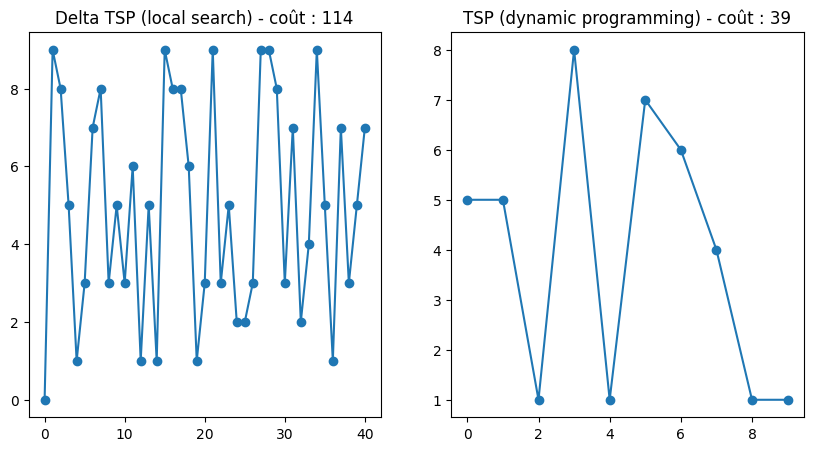

pour n = 10
Delta TSP (approximation) - coût :  237
TSP (dynamic programming) - coût :  59


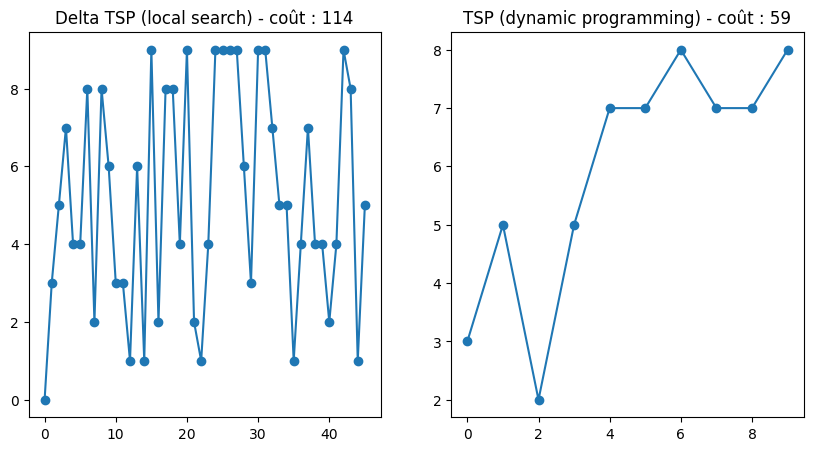

pour n = 10
Delta TSP (approximation) - coût :  240
TSP (dynamic programming) - coût :  46


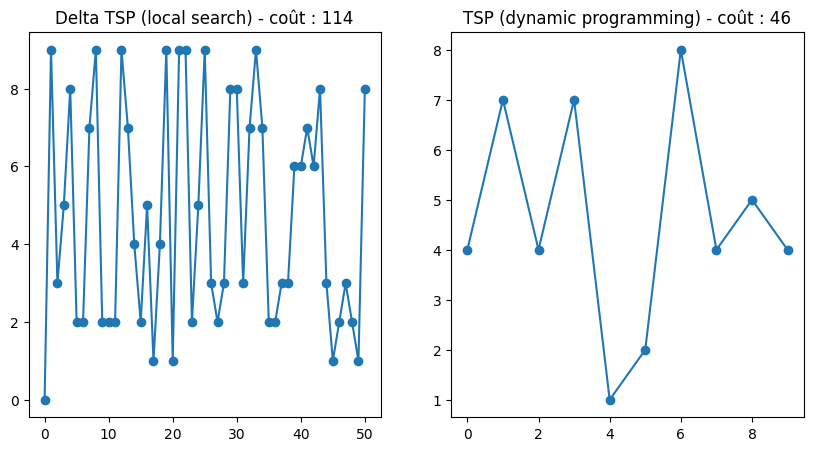

pour n = 10
Delta TSP (approximation) - coût :  261
TSP (dynamic programming) - coût :  52


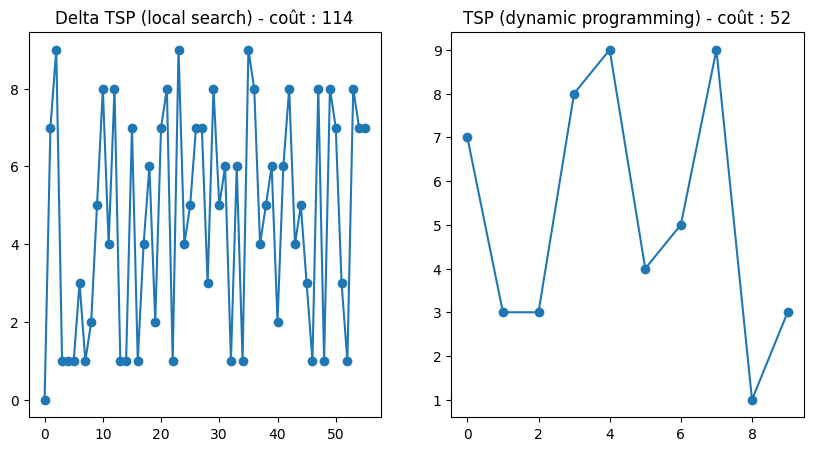

In [72]:
for j in range(10,60,5) :
    print("pour n =",10)
    distances_dict = generate_problem(j)
    tour, tour_cost, upper_bound = delta_tsp_approximation(distances_dict)
    print("Delta TSP (approximation) - coût : ", tour_cost)

    # Calcul de la solution avec tsp_dynamic_programming
    _, optimal_solution = tsp_dynamic_programming(distances_dict, 10)
    optimal_cost = sum([distances_dict[(optimal_solution[k], optimal_solution[k+1])] for k in range(len(optimal_solution)-1)])
    print("TSP (dynamic programming) - coût : ", optimal_cost)

    # Visualisation des solutions
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot([distances_dict[(tour[k], tour[k+1])] for k in range(len(tour)-1)], 'o-')
    axs[0].set_title("Delta TSP (local search) - coût : " + str(current_cost))
    axs[1].plot([distances_dict[(optimal_solution[k], optimal_solution[k+1])] for k in range(len(optimal_solution)-1)], 'o-')
    axs[1].set_title("TSP (dynamic programming) - coût : " + str(optimal_cost))
    plt.show()


conclusion :  On en étudiant les graphiques et en faisant varier les valeurs de n, on constate la qualité de la solution de la programmation est bien meilleure et de loin car elle passe passe par moins de noeuds pour un coût moindre. avec des couts fois 2

##### vitesses d'executions de delta_tsp_approximation

- 1°) nous allons en premier lieu définir quelle est la taille d'instance maximale que delta_tsp_approximation peut résoudre en moins d'une minute

In [41]:
# pour n= 50
distances = generate_problem(50)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)


0.8940000534057617


In [42]:
# pour n= 100
distances = generate_problem(100)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)


26.23799991607666


In [43]:
# pour n= 150
distances = generate_problem(150)
start_time = time.time()
delta_tsp_searchlocal (distances)
elapsed_time = time.time() - start_time
print(elapsed_time)


98.83200001716614


In [44]:
print("la taille maximale de problème pouvant etre résolu est de 150 clients ")

la taille maximale de problème pouvant etre résolu est de 150 clients 


- 2°) visualisation du temps d'éxecution 

0.0
0.0009999275207519531
0.002000093460083008
0.0029997825622558594
0.039999961853027344
0.2239999771118164


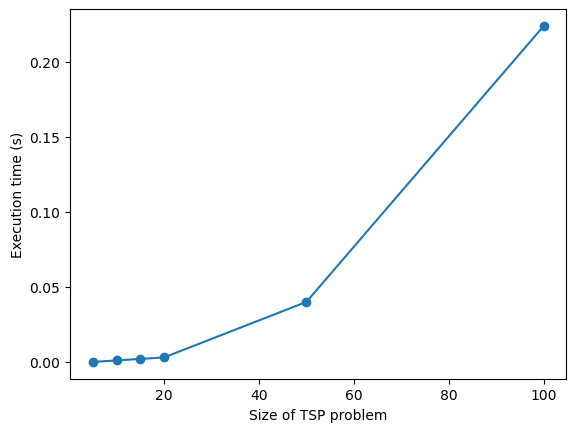

In [73]:
import time
import matplotlib.pyplot as plt

n_list = [5, 10, 15, 20,50,100]
execution_times = []

for n in n_list:
    distances = generate_problem(n)
    start_time = time.time()
    tour, tour_cost, upper_bound = delta_tsp_approximation(distances)
    end_time = time.time()
    print(end_time-start_time)
    execution_times.append(end_time - start_time)

plt.plot(n_list, execution_times, '-o')
plt.xlabel('Size of TSP problem')
plt.ylabel('Execution time (s)')
plt.show()


on conclut que l'approche approximation donne un temps d'execution assez raisonnable

###### conclusion : 


En résumé, le code l'approche approximation utilise l'heuristique de l'arbre de recouvrement minimum pour trouver une borne supérieure pour le coût optimal de la tournée dans le problème du voyageur de commerce. Bien que cette méthode ne garantisse pas la solution optimale, elle fournit une solution de qualité acceptable en temps raisonnable pour de nombreuses instances de ce problème.

## Problème réel 

#### choix le plus adapté : l'approche approximation

Justification :

Pour le problème "réel" avec environ 10 livreurs qui peuvent opérer en parallèle et environ 1000 clients, la programmation dynamique et l'optimisation linéaire en nombre entier peuvent ne pas être les approches les plus efficaces car elles peuvent nécessiter beaucoup de temps de calcul pour résoudre le problème.

En revanche, la recherche locale et l'approximation peuvent être plus adaptées pour ce problème en raison de leur efficacité en termes de temps de calcul.
De surcroît comme l'approche approximation donne des temps d'executions assez raisonnables et ce meme pour des problèmes de grandes tailles, donc nous convenons que l'approche approche approximation est la plus adaptée pour le problème réel.

#### Réolution du problème logistique par l'approximation

Nous commençons d'abord par présenter le fonctionnement de l'algorithme :

Ce code  ci-dessous implémente l'algorithme d'approximation pour résoudre le problème du logistique du dernier kilomètre, qui est un problème de tournée de véhicules. Plus précisément, l'algorithme calcule une tournée pour un livreur qui doit effectuer des livraisons à plusieurs adresses dans un quartier donné, de manière à minimiser la distance totale parcourue.

- 1°) :Le code commence par prendre en entrée une liste de points, qui représentent les adresses des différentes livraisons à effectuer. Il calcule ensuite une matrice des distances entre chaque paire de points, en utilisant la fonction calculate_distance qui calcule la distance euclidienne entre deux points dans un espace à N dimensions.


- 2°) :  À partir de cette matrice de distances, l'algorithme construit un graphe non-orienté où chaque nœud représente une adresse de livraison et chaque arête représente la distance entre deux adresses. Ensuite, il calcule l'arbre de recouvrement minimum de ce graphe, qui est un sous-graphe qui relie tous les nœuds du graphe sans former de cycle et qui a un coût minimal. L'algorithme utilise une file de priorité pour parcourir les nœuds du graphe dans l'ordre de leur coût, et ajoute chaque nœud visité à l'arbre de recouvrement minimum.

- 3°) :Ensuite, l'algorithme effectue un parcours préfixe de l'arbre de recouvrement minimum pour former une tournée de livraison. Il commence par ajouter la racine de l'arbre (qui peut être n'importe quel noeud) à la tournée, puis visite chaque nœud dans l'ordre de parcours de l'arbre en ajoutant chaque nœud visité à la tournée. Finalement, il ajoute à nouveau la racine de l'arbre pour former un circuit fermé.


- 4°) Enfin, l'algorithme calcule le coût de la tournée en additionnant les distances entre chaque paire de nœuds dans l'ordre de la tournée. Il calcule également le coût de l'arbre de recouvrement minimum en additionnant les distances entre chaque paire de nœuds dans l'ordre de l'arbre. Il utilise ensuite cette dernière valeur pour calculer une borne supérieure pour le coût optimal de la tournée, en multipliant par deux le coût de l'arbre de recouvrement minimum.

    La fonction retourne la tournée calculée, son coût, ainsi que la borne supérieure pour le coût optimal de la tournée.

In [74]:
def calculate_distance(point1, point2):
    # Fonction pour calculer la distance entre deux points
    return np.sqrt(np.sum((point1 - point2)**2))

In [76]:

def delta_lastmile_logistics(points):
    # Nombre de livraisons
    n = len(points)

    # Calcul de la matrice des distances entre chaque paire de livraisons
    distances_dict = {}
    for i in range(n):
        for j in range(n):
            # Calcul de la distance entre deux points
            distances_dict[(i+1, j+1)] = calculate_distance(points[i], points[j])

    # Construction du graphe représentant les relations entre les livraisons qui correspond calcule de l'arbre de recouvrement minimum ACM
    graph = {i+1: set() for i in range(n)}
    for i, j in distances_dict:
        graph[i].add(j)
        graph[j].add(i)
    #  Algorithme de Prim pour trouver l'arbre de recouvrement minimum
    visited = set()
    start_node = 1
    priority_queue = [(0, start_node)]

    mst = []
    while priority_queue:
        (cost, node) = priority_queue.pop(0)
        if node not in visited:
            visited.add(node)
            mst.append(node)
            for neighbor in graph[node]:
                # Ajout des voisins dans la file de priorité
                priority_queue.append((distances_dict[(node, neighbor)], neighbor))
            priority_queue.sort()

    # Parcours préfixe de l'arbre de recouvrement minimum
    tour = [mst[0]]
    def visit(node):
        tour.append(node)
        for neighbor in graph[node]:
            if neighbor not in tour:
                visit(neighbor)
    visit(mst[0])

    # Ajout de la racine pour former un circuit
    tour.append(mst[0])

    # Calcul de la borne supérieure du coût du circuit
    tour_cost = sum(distances_dict[(tour[i], tour[i+1])] for i in range(len(tour)-1))
    mst_cost = sum(distances_dict[(mst[i], mst[i+1])] for i in range(len(mst)-1))
    upper_bound = 2*mst_cost

    return tour, tour_cost, upper_bound


#### tests 

Points de livraison :
 [[5 8]
 [9 5]
 [0 0]
 [1 7]
 [6 9]]

Chemin hamiltonien : [1, 1, 2, 3, 4, 5, 1]
Coût total : 29.166076322360077
Borne supérieure du coût optimal : 50.68243952345984


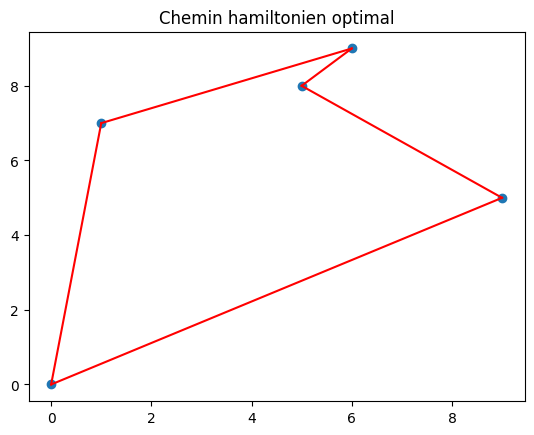

In [77]:

# Génération de 5 points de livraison aléatoires
np.random.seed(1)
points = np.random.randint(0, 10, size=(5, 2))
print("Points de livraison :\n", points)

tour, tour_cost, upper_bound = delta_lastmile_logistics(points)

print("\nChemin hamiltonien :", tour)
print("Coût total :", tour_cost)
print("Borne supérieure du coût optimal :", upper_bound)

fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1])
for i in range(len(tour)-1):
    ax.plot([points[tour[i]-1,0], points[tour[i+1]-1,0]], [points[tour[i]-1,1], points[tour[i+1]-1,1]], 'r-')
ax.set_title("Chemin hamiltonien optimal")
plt.show()
